Reading dataset

In [94]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import re #Regular expressions
from nltk.sentiment.util import *
!pip install twython 
nltk.download('opinion_lexicon')
nltk.download('vader_lexicon')
import os

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/nasim/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nasim/nltk_data...


In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/nasim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
df = pd.read_csv('dataset_sentiment_analysis.csv',header=None, names=["target", "id", "timestamp", "topic", "author", "text"])
print("Dataset size:", len(df))

Dataset size: 498


In [21]:
df.tail()

,target,id,timestamp,topic,author,text
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."
497,0,14076,Sun Jun 14 21:36:17 UTC 2009,iran,captain_pete,Reading the tweets coming out of Iran... The w...


In [25]:
#Map target label to string
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [26]:
df.target = df.target.apply(lambda x:decode_sentiment(x))

In [27]:
df.head()

,target,id,timestamp,topic,author,text
0,POSITIVE,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,POSITIVE,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,POSITIVE,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,POSITIVE,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,POSITIVE,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [29]:
#target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
df.target.value_counts()

POSITIVE    182
NEGATIVE    177
NEUTRAL     139
Name: target, dtype: int64

Text(0.5, 1.0, 'Dataset labels distribuition')

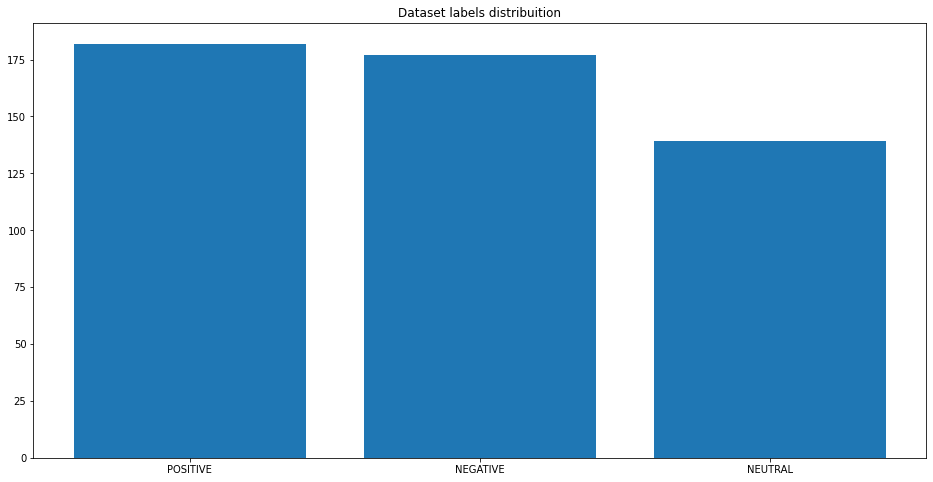

In [35]:
target_cnt = Counter(df.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

Pre-process dataset

In [43]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [44]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [45]:
df.text = df.text.apply(lambda x: preprocess(x))

In [52]:
df_nike = df[df.topic.eq('nike')]
df_nike.shape

(25, 6)

In [65]:
#classify the text based on the lexicon
def get_polarity(sentence):
    return nltk.sentiment.util.demo_liu_hu_lexicon(sentence)

In [66]:
df_new = df_nike.text.apply(lambda x:get_polarity(x))

Neutral
Negative
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Positive


In [68]:
df_new.shape

(25,)

In [85]:
df_world_cup = df[df.topic.eq('world cup')]
df_world_cup

,target,id,timestamp,topic,author,text
260,POSITIVE,1025,Mon May 11 05:52:44 UTC 2009,world cup,jsincere150,world cup 2010 access damn good look


Neutral


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/nltk/sentiment/util.py:319: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


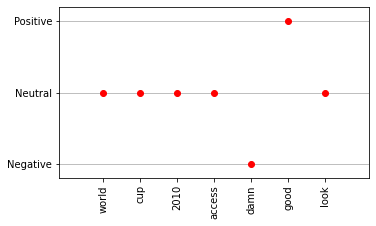

In [86]:
#plot a visual representation of the sentence polarity
nltk.sentiment.util.demo_liu_hu_lexicon(df_world_cup.text.values[0], True)

In [87]:
df_dentist = df[df.topic.eq('dentist')]

In [89]:
len(df_dentist)

17

In [95]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [101]:
sid = SentimentIntensityAnalyzer()
def compound_score(text):
    ss = sid.polarity_scores(text)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

In [103]:
#print the compund score to the console
df_dentist_score = df_dentist.text.apply(lambda x:compound_score(x))

compound: -0.8176, neg: 0.392, neu: 0.471, pos: 0.137, 
compound: 0.6486, neg: 0.127, neu: 0.424, pos: 0.448, 
compound: -0.9169, neg: 0.518, neu: 0.482, pos: 0.0, 
compound: 0.6249, neg: 0.0, neu: 0.328, pos: 0.672, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
compound: -0.7351, neg: 0.861, neu: 0.139, pos: 0.0, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
compound: 0.2732, neg: 0.157, neu: 0.596, pos: 0.247, 
compound: 0.4927, neg: 0.0, neu: 0.61, pos: 0.39, 
compound: -0.5719, neg: 0.649, neu: 0.351, pos: 0.0, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
compound: -0.5719, neg: 0.649, neu: 0.351, pos: 0.0, 
compound: -0.5719, neg: 0.552, neu: 0.448, pos: 0.0, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
